# Setup

Setup a simple pairs trading strategy for Roku (ROKU) and Netflix (NFLX).

We will enter a position (buy) if one stock has moved 5% or more than the other one over the course of the last five days. 
We will sell the top one and buy the bottom one until it reverses.

In [1]:
from backtester.data_handler import DataHandler
from backtester.backtester import Backtester
from backtester.strategies import Strategy

symbol = "NFLX,ROKU"
start_date = "2023-01-01"

# Backtesting

In [2]:
import pandas as pd

data = DataHandler(
    symbol=symbol,
    start_date=start_date,
).load_data()
data = pd.merge(
    data["NFLX"].reset_index(),
    data["ROKU"].reset_index(),
    left_index=True,
    right_index=True,
    suffixes=("_NFLX", "_ROKU"),
)
# We want to trade the ROKU stock so we rename the close_ROKU column to close
data = data.rename(columns={"close_ROKU": "close"})
data.head()

,symbol_NFLX,date_NFLX,open_NFLX,high_NFLX,low_NFLX,close_NFLX,volume_NFLX,vwap_NFLX,adj_close_NFLX,unadjusted_volume_NFLX,...,open_ROKU,high_ROKU,low_ROKU,close,volume_ROKU,vwap_ROKU,adj_close_ROKU,unadjusted_volume_ROKU,change_ROKU,change_percent_ROKU
0,NFLX,2023-01-03,298.06,298.390,288.700,294.95,6763964,293.92,294.950012,6764000.0,...,41.68,42.37,39.0000,40.56,6203011,40.12,40.560001,6203000.0,-1.12,-0.0269
1,NFLX,2023-01-04,298.24,311.135,295.510,309.41,9305454,305.50,309.410004,9345100.0,...,41.43,43.28,39.8418,42.35,8410302,42.03,42.349998,8410300.0,0.92,0.0222
2,NFLX,2023-01-05,307.00,314.180,304.545,309.70,8328390,310.37,309.700012,8328400.0,...,43.59,44.16,40.9300,42.76,9568545,42.27,42.759998,9568500.0,-0.83,-0.0190
3,NFLX,2023-01-06,311.57,316.770,303.690,315.55,8959839,311.60,315.549988,8949600.0,...,42.49,44.46,41.3000,43.60,7298579,43.34,43.599998,7293100.0,1.11,0.0261
4,NFLX,2023-01-09,316.83,321.700,313.220,315.17,6766628,317.07,315.170013,6766600.0,...,44.62,46.49,44.1500,45.19,6636193,45.63,45.189999,6636200.0,0.57,0.0128


Final Portfolio Value: 14387.50
Total Return: 43.88%
Annualized Return: 34.80%
Annualized Volatility: 55.77%
Sharpe Ratio: 0.62
Sortino Ratio: 0.74
Maximum Drawdown: -39.86%


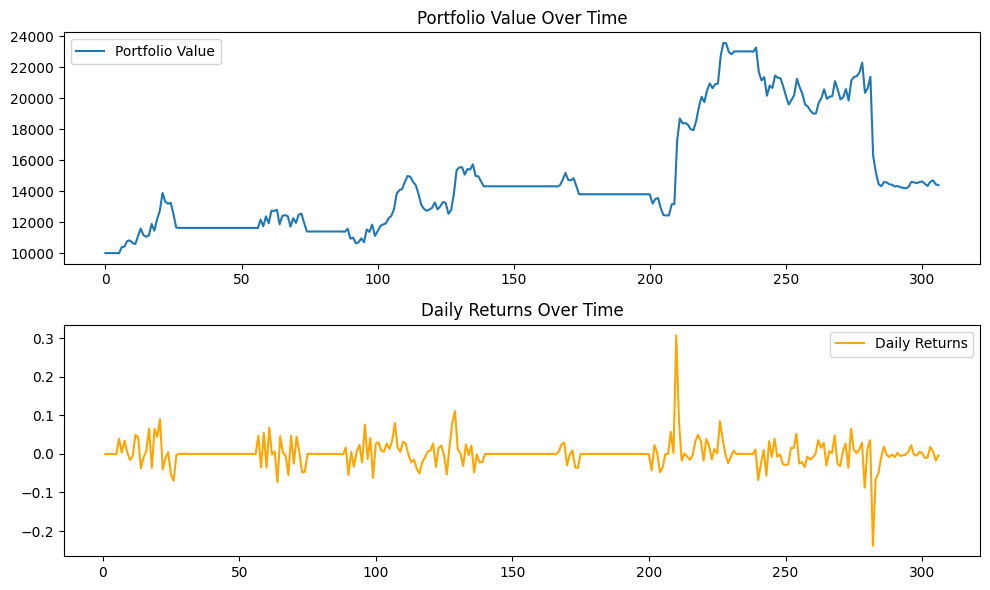

In [3]:
strategy = Strategy(
    indicators={
        "day_5_lookback_NFLX": lambda row: row["close_NFLX"].shift(5),
        "day_5_lookback_ROKU": lambda row: row["close"].shift(5),
    },
    signal_logic=lambda row: (
        1
        if row["close_NFLX"] > row["day_5_lookback_NFLX"] * 1.05
        else -1 if row["close_NFLX"] < row["day_5_lookback_NFLX"] * 0.95 else 0
    ),
)
data = strategy.generate_signals(data)

backtester = Backtester()
backtester.backtest(data)
backtester.calculate_performance()